In [1]:
import numpy as np
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import csv, random, pdb, sys
from IPython.core.debugger import set_trace
import copy
import pickle as pkl

In [2]:
sys.path.insert(0, '../lib/')

In [3]:
from util import *
from graph_utils import *

In [4]:
graph_file = '../data/household_undirected_albe_1.90.txt'
G = read_graph(graph_file)

len(G)

131219

In [5]:
if __name__ == '__main__':
### run for a fixed network and fixed alpha
##########################################

    np.random.seed(0)

    T = 10
    epsilon = 0.001
    alphavals = np.arange(0,3,0.5)
    num_times = 10

    n = len(G)
    p = 0.4;
    
    avg_file_name = './vacc_albemarle_household_1_7_dec7_avg.txt'
    raw_file_name = './vacc_albemarle_household_1_7_dec7_raw.txt' 
    
    raw_data = []
    exp_inf_list = []
    exp_inf_std = []
    n_vacc_size = []
    xlist_alpha = {}

    for alpha in alphavals:
        zs = []
        vacc_size = []
        xlist = []
        
        print("alpha: ", alpha)

        for i in range(num_times):
            x = {}
            Cvacc = {}
            Cinf = {};
            
            for u in G.nodes():
                x[u] = np.random.randint(0, 2)
                Cinf[u] = 1; 
                Cvacc[u] = Cinf[u]*float(alpha)/n
                
            x, nviol = best_response_v2(G, Cvacc, Cinf, x, T, p, epsilon)

            if(nviol == 0):
                z = exp_infsize(G, x, p)
                zs.append(z)

                vaccinated = len([i for i in x if x[i] == 1])
                vacc_size.append(vaccinated)
                xlist.append(x)

        n_vacc_size.append(vacc_size)
        xlist_alpha[alpha] = xlist
        
        zs = np.array(zs)
        exp_inf_list.append(zs.mean())
        exp_inf_std.append(zs.std())
    
    n_vacc_size = np.array(n_vacc_size)


alpha:  0.0
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
alpha:  0.5
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components done
end init comp
init comp
degree done
connected components don

In [10]:
import pandas as pd

df = pd.read_csv('../data/Albe_demographics.csv')
df['pid'] = df['pid'].astype(str)
attrs = df.set_index('pid').to_dict('index')
nx.set_node_attributes(G, attrs)


In [77]:
def graph_boxplot(attribute_name):
    attribute = nx.get_node_attributes(G, attribute_name)
    plt.boxplot(attribute.values())
    plt.xlabel('whole network')
    plt.ylabel(attribute_name)
    plt.savefig('whole network-'+attribute_name)
    plt.show()

def vaccinated_boxplot(attribute_name):
    attribute = nx.get_node_attributes(G, attribute_name)
    data = []
    for alpha in alphavals:
        vaccinated = set()
        for x in xlist_alpha[alpha]:
            for k in x:
                if x[k] == 1:
                    vaccinated.add(k)
        l = [attribute[i] for i in vaccinated]
    
        data.append(l)
        
    data.append(list(attribute.values()))
    labels = list(alphavals)
    labels.append('whole')
    box = plt.boxplot(data, labels=labels)
    plt.xlabel('alpha')
    plt.ylabel(attribute_name)
    plt.savefig('vaccinated nodes-'+attribute_name)
    plt.show()


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 'whole']


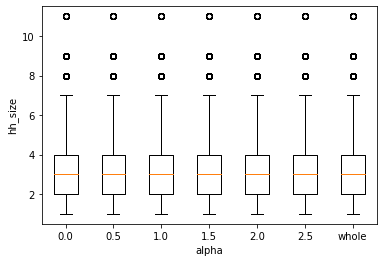

In [78]:
vaccinated_boxplot('hh_size')

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 'whole']


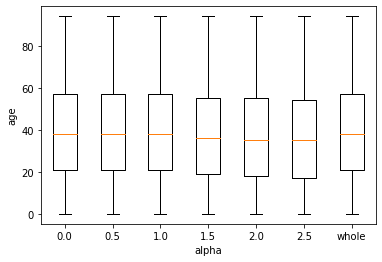

In [79]:
vaccinated_boxplot('age')

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 'whole']


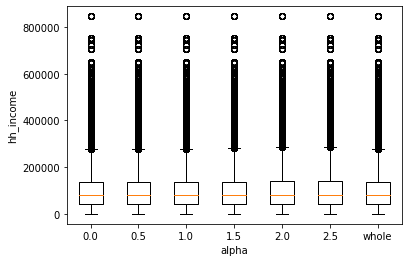

In [80]:
vaccinated_boxplot('hh_income')

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 'whole']


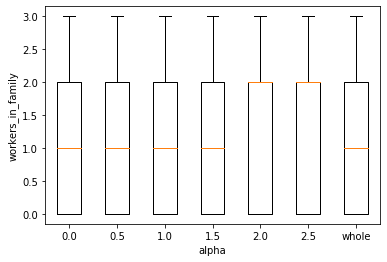

In [81]:
vaccinated_boxplot('workers_in_family')

[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 'whole']


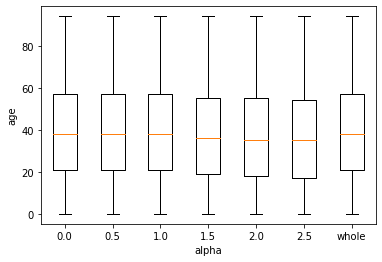

In [79]:
vaccinated_boxplot('age')

In [6]:
print(exp_inf_list)
print(exp_inf_std)

[0.0, 0.0, 2.0205098932271677e-07, 4.6136703889155225e-06, 1.53284421350598e-05, 0.009334049230633969]
[0.0, 0.0, 2.2814852209386423e-09, 7.830770803315284e-09, 5.151611539204541e-07, 0.00019701736880638212]


In [ ]:
z4 = 
z4std =

In [ ]:
print(n_vacc_size)

In [8]:
n_num_vacc_list = np.array(n_vacc_size)
vacc_mean = n_num_vacc_list.mean(axis = 1)
vacc_std = n_num_vacc_list.std(axis = 1)

print(list(vacc_mean))
print(list(vacc_std))

[131219.0, 131219.0, 127740.0, 80403.5, 70168.1, 62736.9]
[0.0, 0.0, 39.28358435784596, 27.463612289718917, 74.20572754174708, 59.068519534520256]


In [ ]:
vacc_mean = 

vacc_std = 

In [ ]:
# np.random.seed(0)
# n = 1000; m = 2
# G = nx.barabasi_albert_graph(n, m)

# k = np.array(vacc_mean).astype(int)
# topk_list = [get_topk_nodes(G, i) for i in k]

# zs = []
# for knodes in topk_list:
#     x = {}
#     for i in G.nodes: x[i] = 0
#     for i in knodes: x[i] = 1

#     z = exp_infsize(G, x, p)

#     zs.append(z)

In [ ]:
# set(topk_list[0])

from util import *
from strategy_vector_manipulator import *

jaccard = []
for x, knodes in zip(xx, topk_list[:17]):
    vacc = get_provax(x)
    v = intersect(set(vacc), set(knodes))
    u = union(set(vacc), set(knodes))

    jaccard.append(len(v)/len(u))

plt.plot(jaccard, 'o-')
plt.xlabel(r'$\alpha$')
plt.ylabel('Jaccard Index')

plt.savefig('2_4_p4.pdf')

In [ ]:
# '2.3  p = 0.4'
# exp_inf = [z4]
# zs
# legend = ['(p = 0.4) Best-response NE ', ' (p = 0.4) Topk Nodes']

# for y in exp_inf:
#     plt.plot(alphavals, y, 'o-')
#     plt.plot(alphavals, zs, 'o-')


# plt.xlabel(r'$\alpha$')
# plt.ylabel('E[#inf]/n')
# #ax.set_title('Montgomery county network')
# plt.legend(legend)
# plt.savefig('2_3_p4.pdf')

In [ ]:
p4 = exp_inf_list
exp_inf = [p4]
legend = ['Best-response NE', 'Topk Nodes']

for y in exp_inf:
    plt.plot(alphavals, y, 'o-')

    plt.plot(alphavals, zs, 'o-')


plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
#ax.set_title('Montgomery county network')
plt.legend(legend)
plt.savefig('2_3_p4.pdf')

In [ ]:
z = [z4]
zstd = [z4std]
legend = ['p = ' + str('%0.2f'%i) for i in [0.4]]
for y in z:
    plt.plot(alphavals, y, 'o-')

plt.xlabel(r'$\alpha$')
plt.ylabel('E[#inf]')
#ax.set_title('Montgomery county network')
plt.legend(legend)
#plt.savefig('out/montgomery_p0.0435.png')

In [ ]:
z = [z4]
zstd = [z4std]
legend = ['p = ' + str('%0.2f'%i) for i in [0.4]]

plt.errorbar(alphavals, vacc_mean, vacc_std, fmt='o-')

plt.xlabel(r'$\alpha$')
plt.ylabel('#vacc')
#ax.set_title('Montgomery county network')
plt.legend(legend)
plt.savefig('2_1_p4.pdf')

In [ ]:
max([G.degree(v) for v in G.nodes()])

In [ ]:
def compare_degree(s1):
    a = [i[1] for i in s1.degree()]
    a2 = collections.Counter(a)
    a2v = list(a2.values())
    
    
    plt.xlim(0,210)
    plt.bar(a2.keys(), np.log(a2v), width = 1)
    plt.xlabel("d"); plt.ylabel("log(Frequency)")
    plt.title("Vaccinated nodes degree distribution")
    plt.savefig('degree_dist_vacc_NE.pdf')
    plt.show()

def compare_cc(s1):
    a = [round(i,2) for i in nx.clustering(s1).values()]   #Round to 0.01,0.02,etc.
    a2 = collections.Counter(a)
    a2v = list(a2.values())
    plt.bar(a2.keys(), np.log(a2v),width=0.01)
    plt.xlabel("Clustering Coefficient"); plt.ylabel("log(Frequency)")
    plt.title("Vaccinated nodes clustering coefficient")
    plt.savefig('cc_dist_vacc_NE.pdf')
    plt.show()



In [ ]:
import collections
from util import *
from strategy_vector_manipulator import *

v10 = set(get_provax(xx[0]))
heh1 = G.subgraph(v10)
compare_degree(heh1)
compare_cc(heh1)



In [ ]:
compare_degree(G)
plt.savefig('degree_dist_vacc_NE.pdf')

In [ ]:
hhs = nx.get_node_attributes(G, 'hh_size')

count = {}

for u in G.nodes:
    if hhs[u] not in count:
        count[hhs[u]] = 0
    count[hhs[u]] += 1

y = np.array(list(count.values()))/len(G.nodes)
    
plt.bar(count.keys(),  y)

## plot for the whole graph

In [ ]:
hhs = nx.get_node_attributes(G, 'hh_size')

hh_count = {}
for x in xx:
    for u in x.keys():
        if(x[u] == 1):
            if hhs[u] not in hh_count.keys():
                hh_count[hhs[u]] = 1
            else:
                hh_count[hhs[u]] += 1
        
    

In [ ]:
for i in hh_count:
    hh_count[i] /= len(xx)

In [ ]:
keys = hh_count.keys()
values = hh_count.values()

plt.bar(keys, values)
plt.ylabel('household_size')
plt.savefig('hist_household_size_vacc_NE.pdf')

In [ ]:
ag = nx.get_node_attributes(G, 'age_group')
# ag

In [ ]:
ag = nx.get_node_attributes(G, 'age_group')

ag_count = {}
for x in xlist_alpha[10]:
    for u in x.keys():
        if(x[u] == 1):
            if ag[u] not in ag_count:
                ag_count[ag[u]] = 1
            else:
                ag_count[ag[u]] += 1

In [ ]:
keys = ag_count.keys()
values = ag_count.values()

print(keys)

plt.bar(keys, values)


In [ ]:
ag = nx.get_node_attributes(G, 'age_group')

count = {}

for u in G.nodes:
    if(u not in ag):
        continue
    if ag[u] not in count:
        count[ag[u]] = 0
    count[ag[u]] += 1

plt.bar(count.keys(), count.values())
plt.savefig('hist_age_group_vacc_NE.pdf')

In [ ]:
len(G.nodes)

In [ ]:
hhi = nx.get_node_attributes(G, 'hh_income')


income = []
for x in xx:
    for u in x.keys():
        if( u in hhi.keys() and x[u] == 1):
            income.append(hhi[u])
    

In [ ]:
plt.hist(income)
plt.ylabel('income')
plt.savefig('hist_income_vacc_NE.pdf')

In [ ]:
plt.hist([hhi[i] for i in hhi])

In [ ]:
es = nx.get_node_attributes(G, 'employment_status')


employ = []
for x in xx:
    for u in x.keys():
        if( u in es.keys() and x[u] == 1):
            employ.append(es[u])

In [ ]:
plt.hist(employ)
plt.ylabel('employment status')

plt.savefig('hist_employment_status_NE.pdf')

In [ ]:
plt.hist([es[i] for i in es])